# Students Performance in Exams

In the following research I will try to learn about the students performance in exams.

#### Variables:
* gender
* race/athnicity
* parental level of education
* lunch
* test preparation course
* math score
* reading score
* writing score

#### Questions:
* Did the student performance went well?
* Did the student's score avg passed the exam?
* Did the student passed all criterias?
* How much of the students who took the test preperation course had passed?

* Check women succes rate.
* Group By

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Let's import the data:

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

Now, we will continue towatds learning some details about the dataset.

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [81]:
df.groupby(['race/ethnicity', 'gender']).describe()

math score                        ... writing score              
                           count       mean        std  ...           50%    75%    max
race/ethnicity gender                                   ...                            
group A        female       36.0  58.527778  14.157252  ...          67.0  77.50   97.0
               male         53.0  63.735849  14.520742  ...          60.0  69.00   92.0
group B        female      104.0  61.403846  16.256750  ...          71.5  80.00   96.0
               male         86.0  65.930233  14.156928  ...          60.0  69.75   92.0
group C        female      180.0  62.033333  15.007224  ...          74.0  82.00  100.0
               male        139.0  67.611511  14.090037  ...          62.0  71.50   95.0
group D        female      129.0  65.248062  14.174157  ...          76.0  83.00  100.0
               male        133.0  69.413534  13.094139  ...          67.0  75.00   99.0
group E        female       69.0  70.811594  16.269129  ...          76.0  87.00  100.0
               male         71.0  76.746479  14.298570  ...          70.0  76.50  100.0

[10 rows x 24 columns]

In [16]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [92]:
df.groupby(['parental level of education', 'test preparation course']).count()

gender  ...  writing score
parental level of education test preparation course          ...               
associate's degree          completed                    82  ...             82
                            none                        140  ...            140
bachelor's degree           completed                    46  ...             46
                            none                         72  ...             72
high school                 completed                    56  ...             56
                            none                        140  ...            140
master's degree             completed                    20  ...             20
                            none                         39  ...             39
some college                completed                    77  ...             77
                            none                        149  ...            149
some high school            completed                    77  ...             77
                            none                        102  ...            102

[12 rows x 6 columns]

In [24]:
df.groupby(['gender', 'test preparation course']).count()

race/ethnicity  ...  writing score
gender test preparation course                  ...               
female completed                           184  ...            184
       none                                334  ...            334
male   completed                           174  ...            174
       none                                308  ...            308

[4 rows x 6 columns]

In [25]:
df1 = df.copy()

In [28]:
df1['avg'] = (df1['math score'] + df1['reading score'] + df1['writing score']) / 3


In [31]:
df1.drop(columns=['math score', 'reading score', 'writing score'], axis=1, inplace=True)

In [32]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [35]:
df1[df1.avg >= 60]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
4,male,group C,some college,standard,none,76.333333
5,female,group B,associate's degree,standard,none,77.333333
...,...,...,...,...,...,...
994,male,group A,high school,standard,none,62.666667
995,female,group E,master's degree,standard,completed,94.000000
997,female,group C,high school,free/reduced,completed,65.000000
998,female,group D,some college,standard,completed,74.333333


In [38]:
df1['passed'] = df1['avg'] >= 60

## Target

*From Now On I will refer 'Passed' column as my target column(Y)*

*** ***

In [39]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg,passed
0,female,group B,bachelor's degree,standard,none,72.666667,True
1,female,group C,some college,standard,completed,82.333333,True
2,female,group B,master's degree,standard,none,92.666667,True
3,male,group A,associate's degree,free/reduced,none,49.333333,False
4,male,group C,some college,standard,none,76.333333,True


Let's Check some of the students score distribution and theit avg..


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


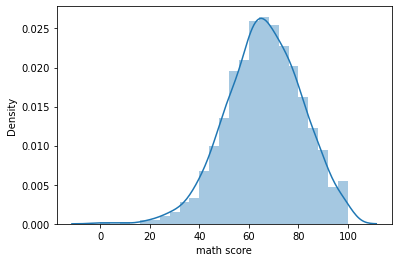

In [40]:
sb.distplot(df['math score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


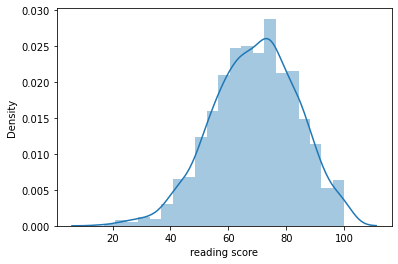

In [41]:
sb.distplot(df['reading score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


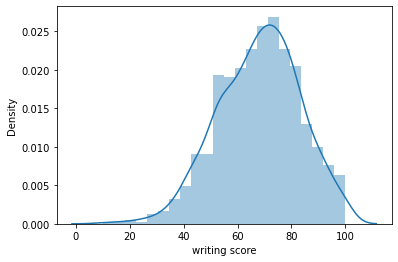

In [42]:
sb.distplot(df['writing score'])

Now Let's check the avg:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


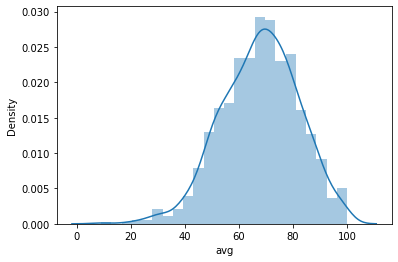

In [43]:
sb.distplot(df1.avg)

In [44]:
df1.describe()

,avg
count,1000.000000
mean,67.770667
std,14.257326
min,9.000000
25%,58.333333
50%,68.333333
75%,77.666667
max,100.000000


In [47]:
df1[df1['avg'] == 9]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg,passed
59,female,group C,some high school,free/reduced,none,9.0,False


In [50]:
df1.groupby(['gender', 'race/ethnicity','passed']).count()

parental level of education  ...  avg
gender race/ethnicity passed                               ...     
female group A        False                            15  ...   15
                      True                             21  ...   21
       group B        False                            23  ...   23
                      True                             81  ...   81
       group C        False                            46  ...   46
                      True                            134  ...  134
       group D        False                            29  ...   29
                      True                            100  ...  100
       group E        False                            11  ...   11
                      True                             58  ...   58
male   group A        False                            25  ...   25
                      True                             28  ...   28
       group B        False                            36  ...   36
                      True                             50  ...   50
       group C        False                            51  ...   51
                      True                             88  ...   88
       group D        False                            36  ...   36
                      True                             97  ...   97
       group E        False                            13  ...   13
                      True                             58  ...   58

[20 rows x 4 columns]

In [51]:
df1.corr()

,avg,passed
avg,1.000000,0.772761
passed,0.772761,1.000000


In [52]:
df2 = df1.copy()

Let's use df2 to parse data into numerc values:

In [56]:
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg,passed
0,1,group B,bachelor's degree,standard,none,72.666667,True
1,1,group C,some college,standard,completed,82.333333,True
2,1,group B,master's degree,standard,none,92.666667,True
3,2,group A,associate's degree,free/reduced,none,49.333333,False
4,2,group C,some college,standard,none,76.333333,True


In [55]:
df2.gender.replace({'female': 1, 'male': 2}, inplace=True)

In [57]:
df2['ple'] = df2['parental level of education']

In [58]:
df2['prep_course'] = df2['test preparation course']

In [59]:
df2.drop(columns=['parental level of education', 'test preparation course'], inplace=True)

In [60]:
df2.head()

,gender,race/ethnicity,lunch,avg,passed,ple,prep_course
0,1,group B,standard,72.666667,True,bachelor's degree,none
1,1,group C,standard,82.333333,True,some college,completed
2,1,group B,standard,92.666667,True,master's degree,none
3,2,group A,free/reduced,49.333333,False,associate's degree,none
4,2,group C,standard,76.333333,True,some college,none


In [61]:
df2.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [62]:
df2.prep_course.unique()

array(['none', 'completed'], dtype=object)

In [63]:
df2.lunch.replace({'standard': 1, 'free/reduced': 0}, inplace=True)
df2.prep_course.replace({'completed': 1, 'none': 0}, inplace=True)

In [64]:
df2.ple.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: ple, dtype: int64

In [65]:
df2.ple.replace({"some high school": 1, "high school": 1, 
                 "some college": 2, "associate's degree": 2, 
                 "bachelor's degree": 3, "master's degree": 4}, inplace=True)

In [66]:
df2.head()

,gender,race/ethnicity,lunch,avg,passed,ple,prep_course
0,1,group B,1,72.666667,True,3,0
1,1,group C,1,82.333333,True,2,1
2,1,group B,1,92.666667,True,4,0
3,2,group A,0,49.333333,False,2,0
4,2,group C,1,76.333333,True,2,0


In [68]:
df2["kind"] = df2["race/ethnicity"]
df2.drop(columns=['race/ethnicity'], inplace=True)
df2.head()

,gender,lunch,avg,passed,ple,prep_course,kind
0,1,1,72.666667,True,3,0,group B
1,1,1,82.333333,True,2,1,group C
2,1,1,92.666667,True,4,0,group B
3,2,0,49.333333,False,2,0,group A
4,2,1,76.333333,True,2,0,group C


In [69]:
df2.kind = df2.kind.apply(lambda x: x.split(' ')[1])
df2.head()

,gender,lunch,avg,passed,ple,prep_course,kind
0,1,1,72.666667,True,3,0,B
1,1,1,82.333333,True,2,1,C
2,1,1,92.666667,True,4,0,B
3,2,0,49.333333,False,2,0,A
4,2,1,76.333333,True,2,0,C


<Figure size 864x576 with 0 Axes>

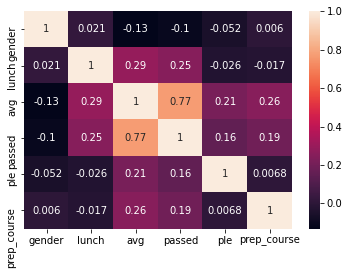

<Figure size 864x576 with 0 Axes>

In [94]:
sb.heatmap(df2.corr(), annot=True)
plt.figure(figsize=(12,8))

True     715
False    285
Name: passed, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


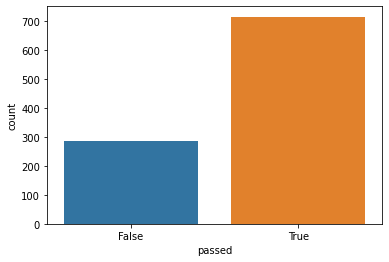

In [95]:
print(df2.passed.value_counts())
sb.countplot(df2.passed)

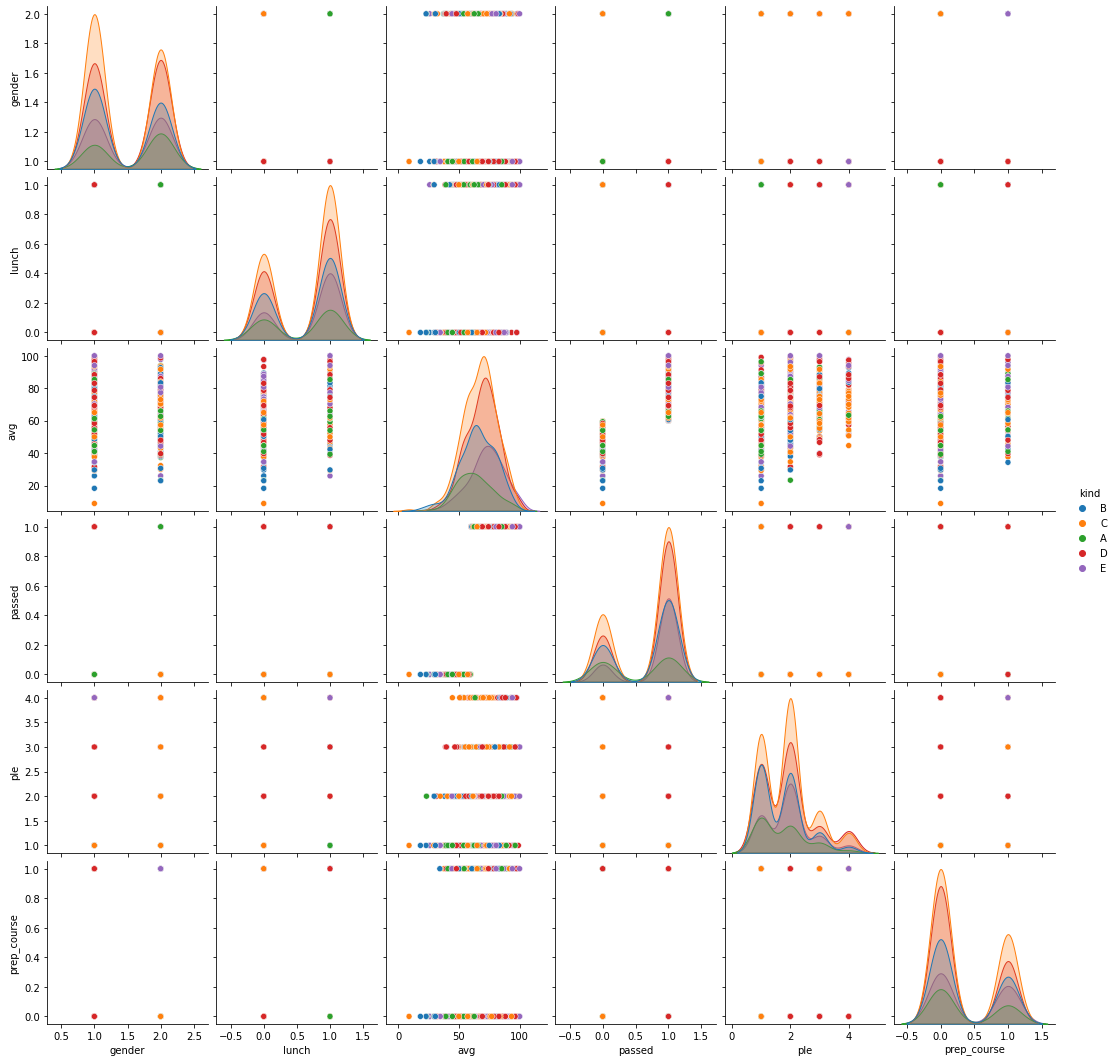

In [97]:
sb.pairplot(df2, hue="kind")

In [100]:
df2['math'] = df['math score']
df2['reading'] = df['reading score']
df2['writing'] = df['writing score']


In [101]:
df3 = df2.drop('avg', axis=1)

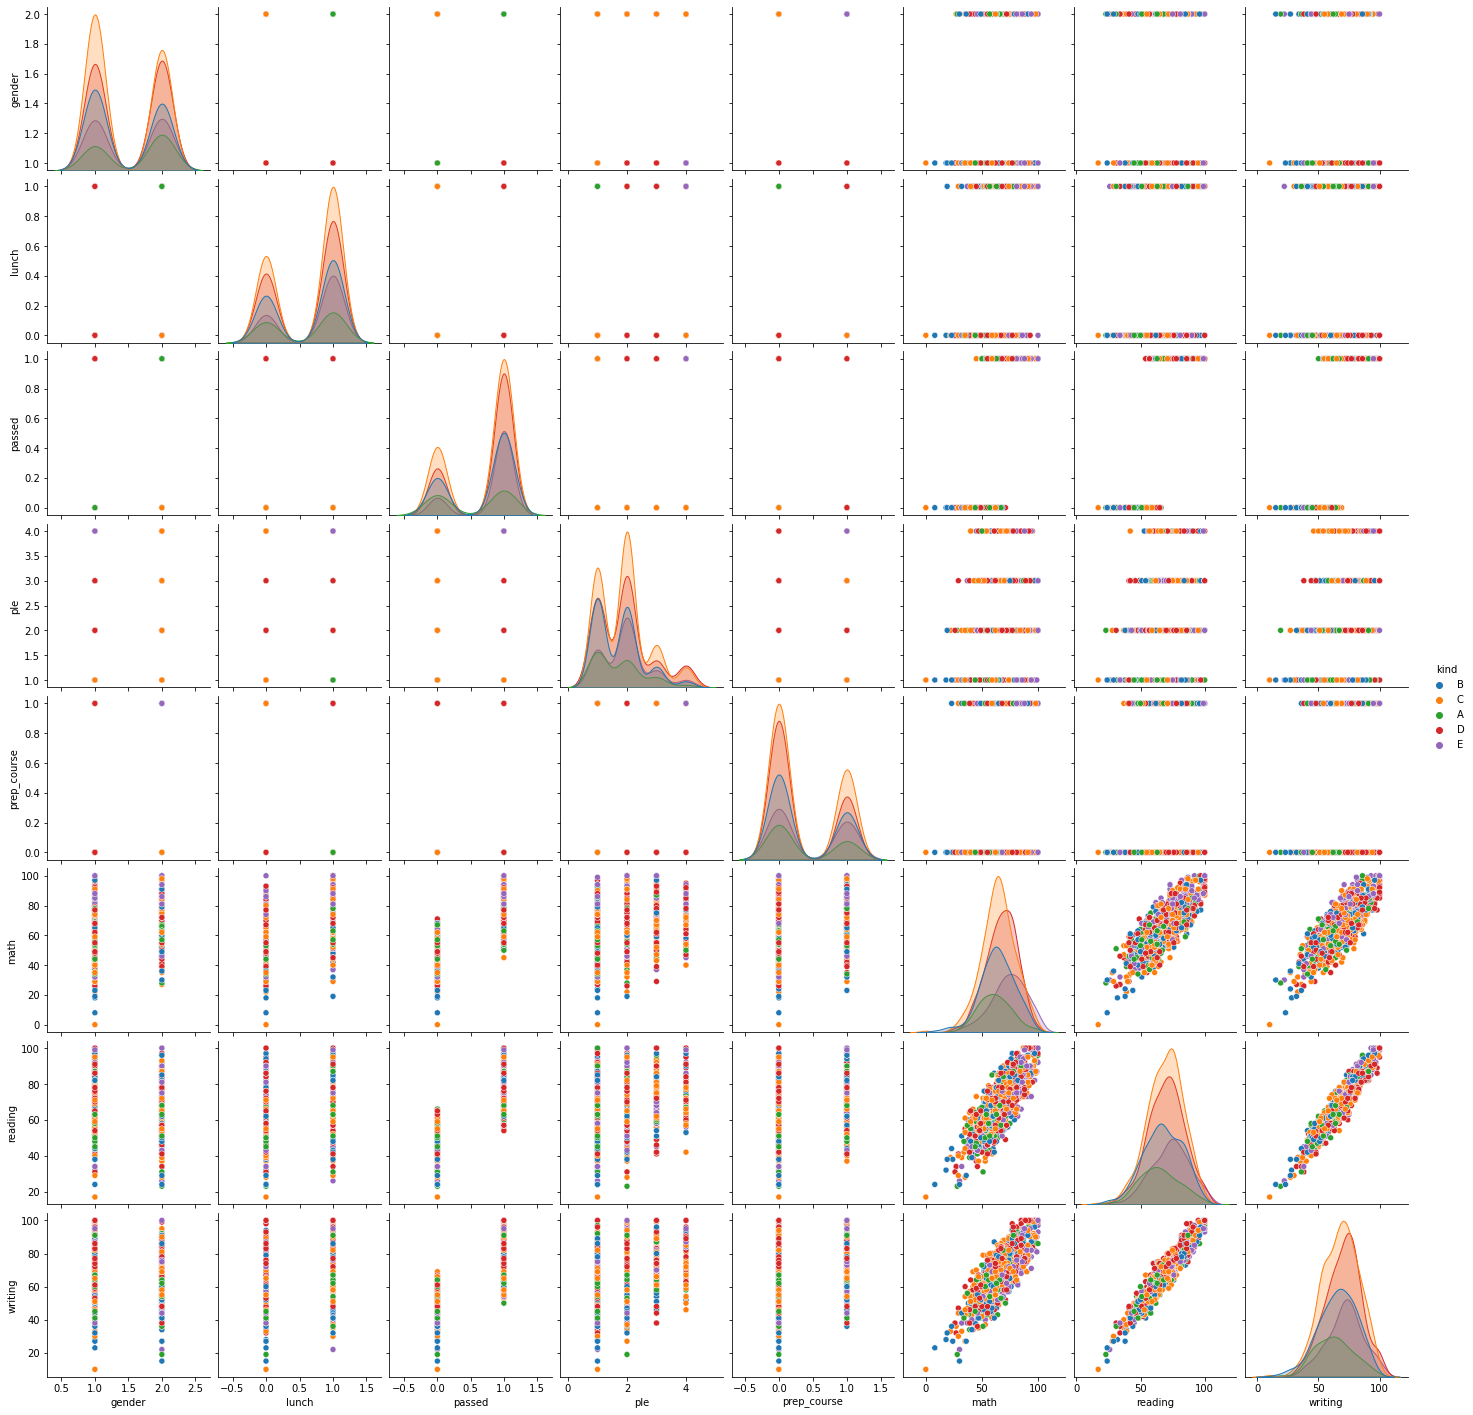

In [102]:
sb.pairplot(df3, hue="kind")

In [107]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [116]:
dff1 = df2.copy()
dff2 = df.copy()

In [117]:
dff2['passed'] = ((dff2['math score'] + dff2['reading score'] + dff2['writing score']) / 3) >= 60

In [129]:
dff1.head()

,gender,lunch,passed,ple,prep_course,kind,math,reading,writing
0,1,1,True,3,0,B,72,72,74
1,1,1,True,2,1,C,69,90,88
2,1,1,True,4,0,B,90,95,93
3,2,0,False,2,0,A,47,57,44
4,2,1,True,2,0,C,76,78,75


In [120]:
dff1.drop('avg', axis=1, inplace=True)

In [119]:
dff2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,passed
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True
2,female,group B,master's degree,standard,none,90,95,93,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,False
4,male,group C,some college,standard,none,76,78,75,True


In [156]:
dff1.head()

,gender,lunch,passed,ple,prep_course,kind,math,reading,writing
0,1,1,True,3,0,B,72,72,74
1,1,1,True,2,1,C,69,90,88
2,1,1,True,4,0,B,90,95,93
3,2,0,False,2,0,A,47,57,44
4,2,1,True,2,0,C,76,78,75


In [176]:
dff1.kind.replace({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}, inplace=True)

# Create Train and Predict with a Model

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [177]:
X = dff1.drop(columns=['passed', 'math', 'reading', 'writing'], axis=1)
y = dff1.passed

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [180]:
model = DecisionTreeClassifier(random_state=40, min_samples_leaf=2)

In [181]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [182]:
model.score(X_train, y_train)

0.77625

In [183]:
pred = model.predict(X_test)

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [185]:
score = accuracy_score(y_test, pred)
score

0.69

In [186]:
model.score(X_test, y_test)

0.69

In [187]:
print(f"Classification Report:\n")
print(classification_report(y_test, pred))
print(f"\nConfusion Matrix:\n")
print(confusion_matrix(y_test, pred))

Classification Report:

              precision    recall  f1-score   support

       False       0.50      0.42      0.46        62
        True       0.76      0.81      0.78       138

    accuracy                           0.69       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.68      0.69      0.68       200


Confusion Matrix:

[[ 26  36]
 [ 26 112]]


In [200]:
a = X_test.iloc[[0]]
print(X_test.iloc[[0]])
print(model.predict_proba(a)[0][1])
print(model.predict_proba(np.array([[2,0,3,1,5]]))[0][1])

     gender  lunch  ple  prep_course  kind
521       1      1    2            0     3
0.7272727272727273
0.8
